/jobfs/140972871.gadi-pbs/ipykernel_238943/2236252383.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


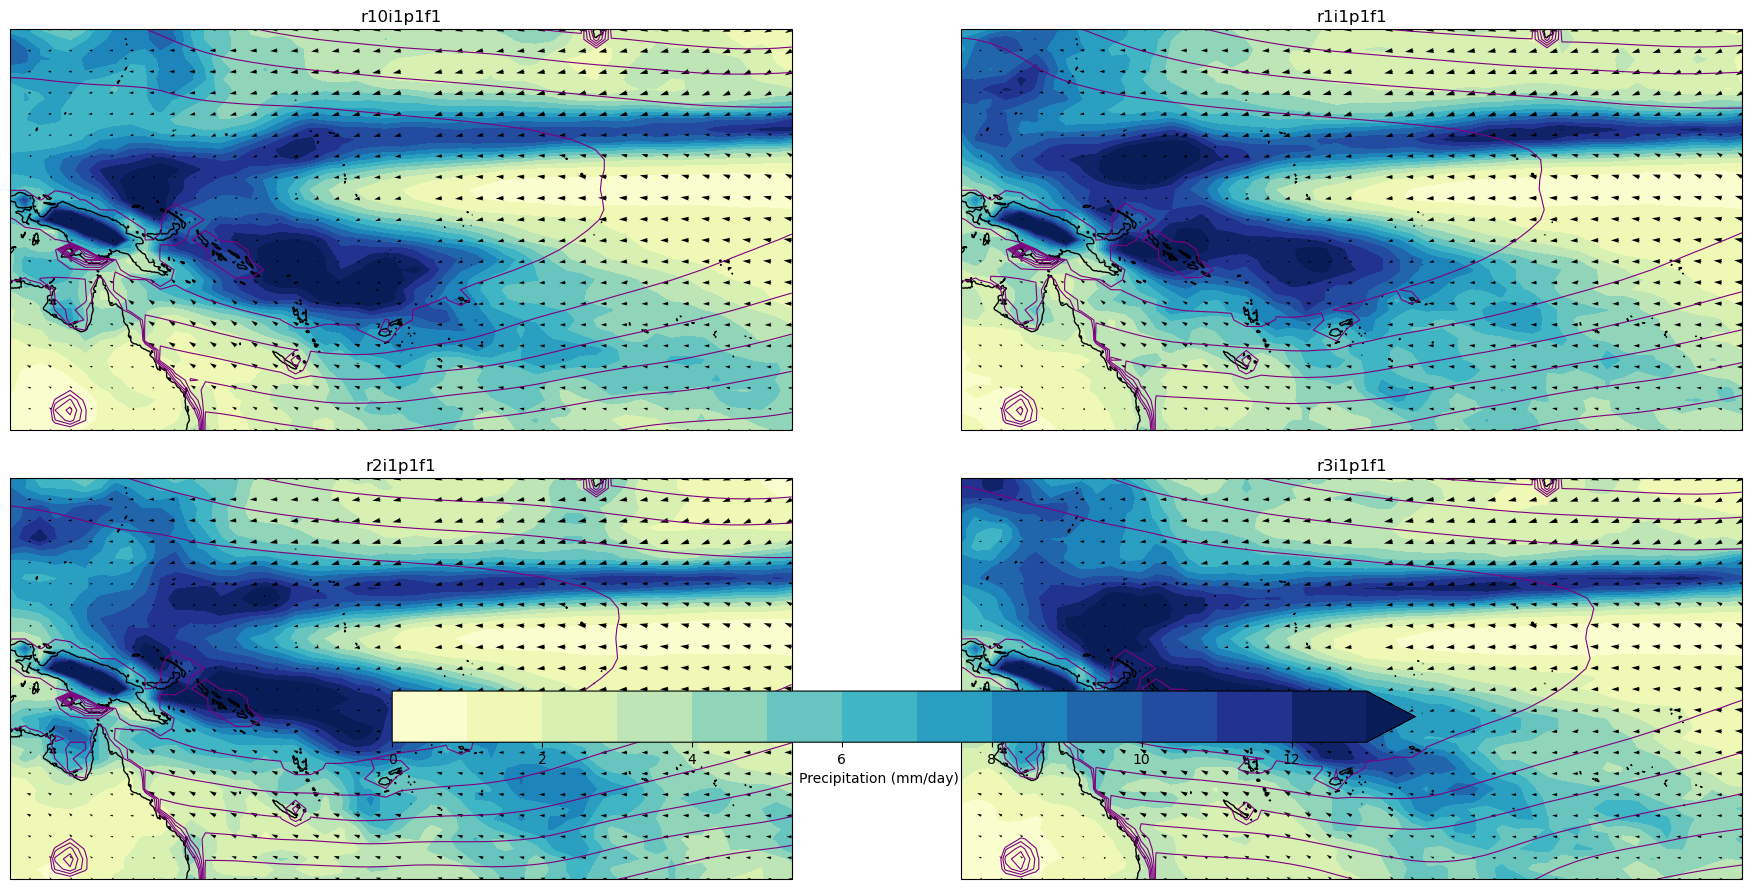

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# File path
amip_path = '/scratch/nf33/hk25-ConvZones'
amip_file = 'access_amip_ensemble_tot_avg_201303_201402.nc'
ds = xr.open_dataset(f"{amip_path}/{amip_file}")

# Region selection: 30°S to 10°N and 140°E to 220°E (0–360 format)
ds_sel = ds.sel(lat=slice(-30, 20), lon=slice(130, 230))

# Convert variables
pr_mm_day = ds_sel['pr'] * 86400  # mm/day
uas = ds_sel['uas']
vas = ds_sel['vas']
ps = ds_sel['ps'] / 100  # hPa

# Runs
runs = ds_sel['run'].values
runs = runs[:4]  # Subset first 4 runs
n_runs = len(runs)

# Longitude and latitude
lons = ds_sel['lon']
lats = ds_sel['lat']

# Set up figure with 2 rows
nrows = 2
ncols = int(np.ceil(n_runs / nrows))  # Ensure it's an int
fig, axs = plt.subplots(nrows, ncols, figsize=(22, 9),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
axs = axs.flatten()


for i, run_name in enumerate(runs):
    ax = axs[i]

    # Select data for run
    pr = pr_mm_day.sel(run=run_name)
    u = uas.sel(run=run_name)
    v = vas.sel(run=run_name)
    pressure = ps.sel(run=run_name)

    # Contour fill: precipitation
    cf = ax.contourf(lons, lats, pr, levels=range(0, 14), cmap='YlGnBu', extend='max',
                     transform=ccrs.PlateCarree())

    # Quiver: wind vectors (subsampled)
    ax.quiver(lons[::vec_step], lats[::vec_step], u[::vec_step, ::vec_step], v[::vec_step, ::vec_step], scale=700, regrid_shape=20,
              transform=ccrs.PlateCarree())

    # Contour: surface pressure
    ax.contour(lons, lats, pressure, levels=range(1008, 1022, 2), colors='purple', linewidths=0.8,
               transform=ccrs.PlateCarree())

    # Map styling
    ax.coastlines()
    ax.set_title(str(run_name))
    # ax.set_extent([130, 230, -30, 20], crs=ccrs.PlateCarree())

# Shared colorbar
cbar = fig.colorbar(cf, ax=axs, orientation='horizontal', shrink=0.6, pad=0.05,
                    label='Precipitation (mm/day)')

plt.tight_layout()
plt.show()


/jobfs/140972871.gadi-pbs/ipykernel_238943/1407456866.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


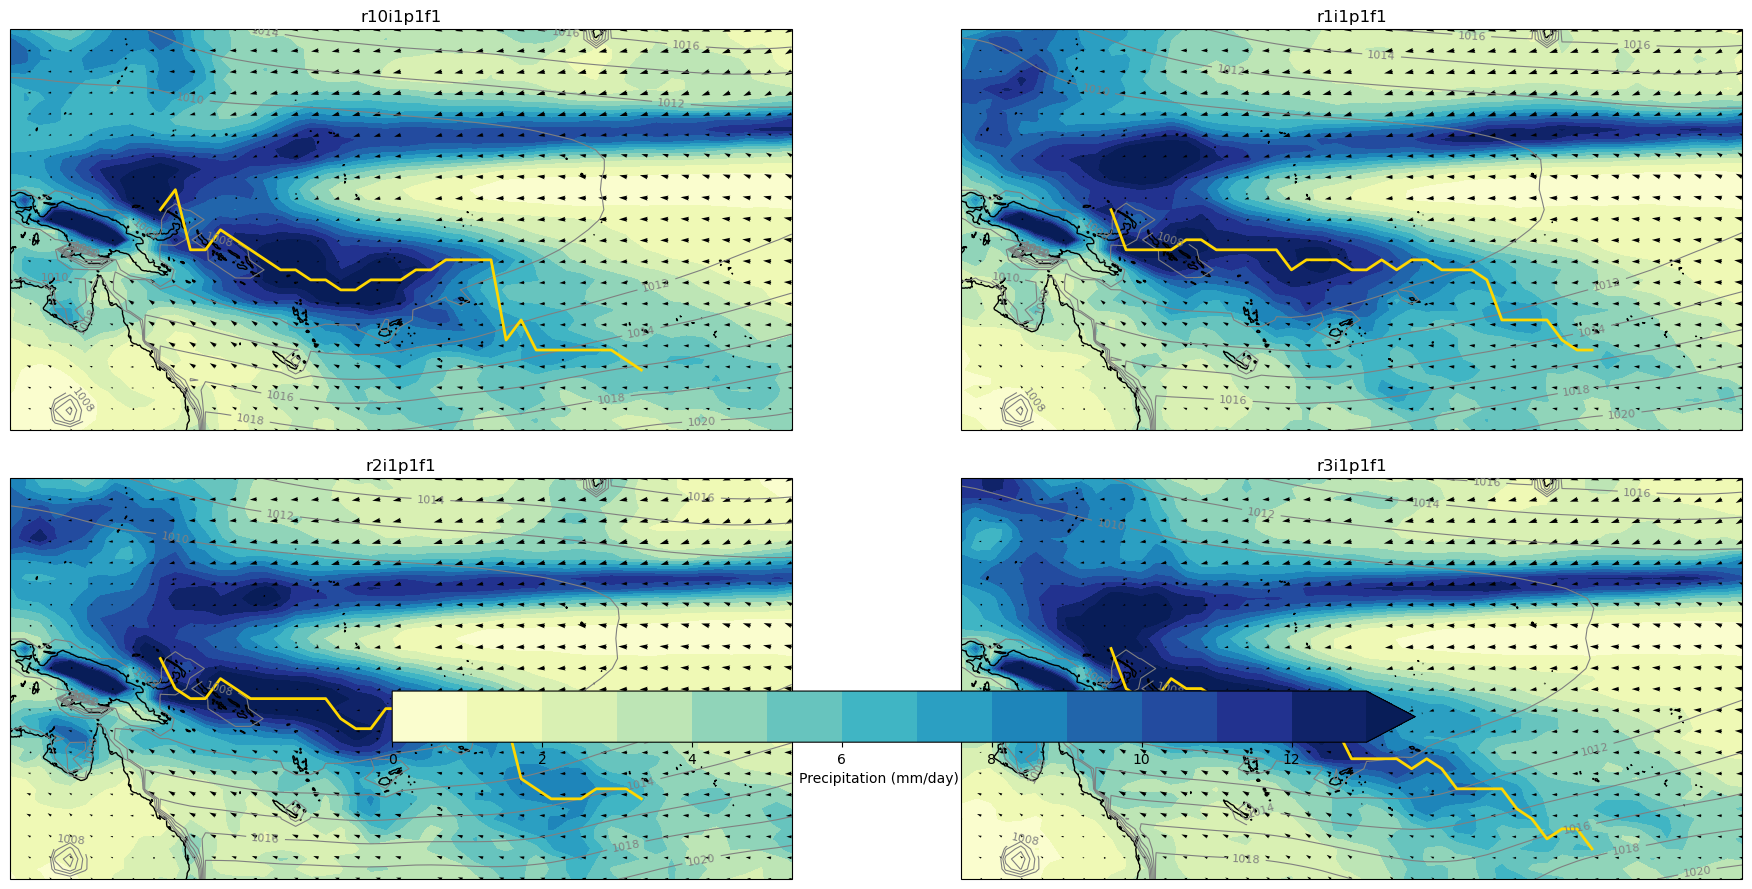

In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# File path
amip_path = '/scratch/nf33/hk25-ConvZones'
amip_file = 'access_amip_ensemble_tot_avg_201303_201402.nc'
ds = xr.open_dataset(f"{amip_path}/{amip_file}")

# Region selection: 30°S to 20°N and 130°E to 230°E
ds_sel = ds.sel(lat=slice(-30, 20), lon=slice(130, 230))

# Convert variables
pr_mm_day = ds_sel['pr'] * 86400  # mm/day
uas = ds_sel['uas']
vas = ds_sel['vas']
ps = ds_sel['ps'] / 100  # hPa

# Runs
runs = ds_sel['run'].values[:4]  # Limit to first 4 runs
n_runs = len(runs)

# Longitude and latitude
lons = ds_sel['lon']
lats = ds_sel['lat']

# Set up figure
nrows = 2
ncols = int(np.ceil(n_runs / nrows))
fig, axs = plt.subplots(nrows, ncols, figsize=(22, 9),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
axs = axs.flatten()

for i, run_name in enumerate(runs):
    ax = axs[i]

    # Select data for run
    pr = pr_mm_day.sel(run=run_name)
    u = uas.sel(run=run_name)
    v = vas.sel(run=run_name)
    pressure = ps.sel(run=run_name)

    # Precipitation: filled contour
    cf = ax.contourf(lons, lats, pr, levels=range(0, 14), cmap='YlGnBu', extend='max',
                     transform=ccrs.PlateCarree())

    # Wind: quiver (subsampled)
    ax.quiver(lons[::vec_step], lats[::vec_step], u[::vec_step, ::vec_step], v[::vec_step, ::vec_step], scale=700, regrid_shape=20,
              transform=ccrs.PlateCarree())

    # Pressure: contour + labels
    cs = ax.contour(lons, lats, pressure, levels=range(1008, 1022, 2), colors='gray', linewidths=0.8,
                    transform=ccrs.PlateCarree())
    ax.clabel(cs, inline=1, fontsize=8, fmt='%d')

    # SPCZ line (gold): max precipitation latitude per longitude
    spcz_lon_range = lons.sel(lon=slice(150, 210)).values
    spcz_lat = []

    for lon in spcz_lon_range:
        # Select nearest longitude first (scalar selection with method)
        pr_lon = pr.sel(lon=lon, method='nearest')

        # Then slice latitude range safely (without method)
        pr_sub = pr_lon.sel(lat=slice(-30, 0))

        # Get latitude of max precipitation
        lat_max = pr_sub.lat[pr_sub.argmax(dim='lat')].values
        spcz_lat.append(lat_max)

    # Plot the SPCZ line
    ax.plot(spcz_lon_range, spcz_lat, color='gold', linewidth=2,
            transform=ccrs.PlateCarree(), label='SPCZ')

    # Map styling
    ax.coastlines()
    ax.set_title(str(run_name))

# Shared colorbar
cbar = fig.colorbar(cf, ax=axs, orientation='horizontal', shrink=0.6, pad=0.05,
                    label='Precipitation (mm/day)')

plt.tight_layout()
plt.show()


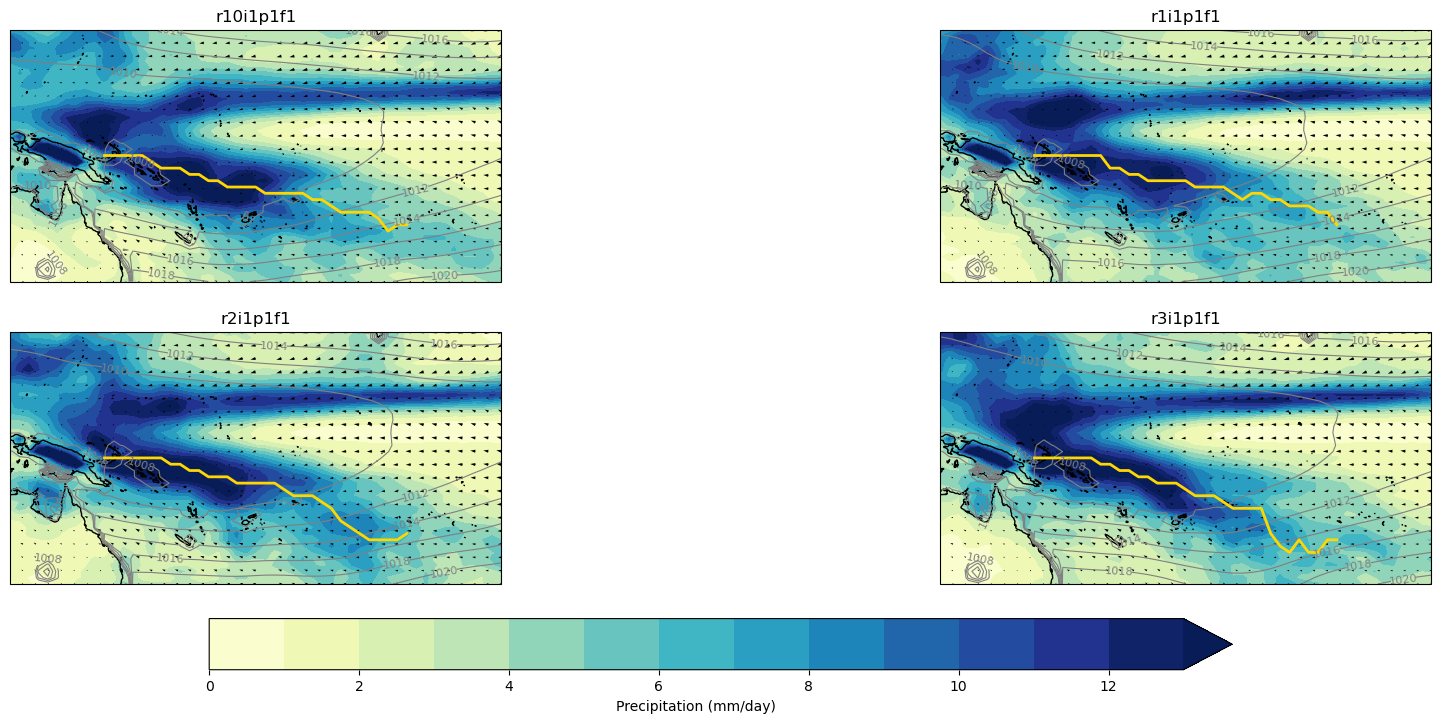

In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# File path
amip_path = '/scratch/nf33/hk25-ConvZones'
amip_file = 'access_amip_ensemble_tot_avg_201303_201402.nc'
ds = xr.open_dataset(f"{amip_path}/{amip_file}")

# Region selection: 30°S to 20°N and 130°E to 230°E
ds_sel = ds.sel(lat=slice(-30, 20), lon=slice(130, 230))

# Convert variables
pr_mm_day = ds_sel['pr'] * 86400  # mm/day
uas = ds_sel['uas']
vas = ds_sel['vas']
ps = ds_sel['ps'] / 100  # hPa

# Runs
runs = ds_sel['run'].values[:4]  # Limit to first 4 runs
n_runs = len(runs)

# Longitude and latitude
lons = ds_sel['lon']
lats = ds_sel['lat']

# Set up figure
nrows = 2
ncols = int(np.ceil(n_runs / nrows))
fig, axs = plt.subplots(nrows, ncols, figsize=(22, 9),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
axs = axs.flatten()

for i, run_name in enumerate(runs):
    ax = axs[i]

    # Select data for run
    pr = pr_mm_day.sel(run=run_name)
    u = uas.sel(run=run_name)
    v = vas.sel(run=run_name)
    pressure = ps.sel(run=run_name)

    # Precipitation: filled contour
    cf = ax.contourf(lons, lats, pr, levels=range(0, 14), cmap='YlGnBu', extend='max',
                     transform=ccrs.PlateCarree())

    # Wind: quiver (subsampled)
    ax.quiver(lons[::vec_step], lats[::vec_step], u[::vec_step, ::vec_step], v[::vec_step, ::vec_step], scale=700, regrid_shape=20,
              transform=ccrs.PlateCarree())

    # Pressure: contour + labels
    cs = ax.contour(lons, lats, pressure, levels=range(1008, 1022, 2), colors='gray', linewidths=0.8,
                    transform=ccrs.PlateCarree())
    ax.clabel(cs, inline=1, fontsize=8, fmt='%d')

    # SPCZ line (gold): smoothed max precipitation latitude per longitude
    spcz_lon_range = lons.sel(lon=slice(150, 210)).values
    spcz_lat = []

    for lon in spcz_lon_range:
        # Select longitude (nearest point)
        pr_lon = pr.sel(lon=lon, method='nearest')

        # Restrict to latitude band
        pr_sub = pr_lon.sel(lat=slice(-30, 0))

        # Apply rolling mean over latitude with window size 5
        pr_smooth = pr_sub.rolling(lat=10, center=True).mean()

        # Get latitude of max smoothed precipitation
        lat_max = pr_smooth.lat[pr_smooth.argmax(dim='lat')].values
        spcz_lat.append(lat_max)

    # Plot the SPCZ line
    ax.plot(spcz_lon_range, spcz_lat, color='gold', linewidth=2,
            transform=ccrs.PlateCarree(), label='SPCZ')

    # Map styling
    ax.coastlines()
    ax.set_title(str(run_name))

# Shared colorbar
cbar = fig.colorbar(cf, ax=axs, orientation='horizontal', shrink=0.6, pad=0.05,
                    label='Precipitation (mm/day)')

plt.show()


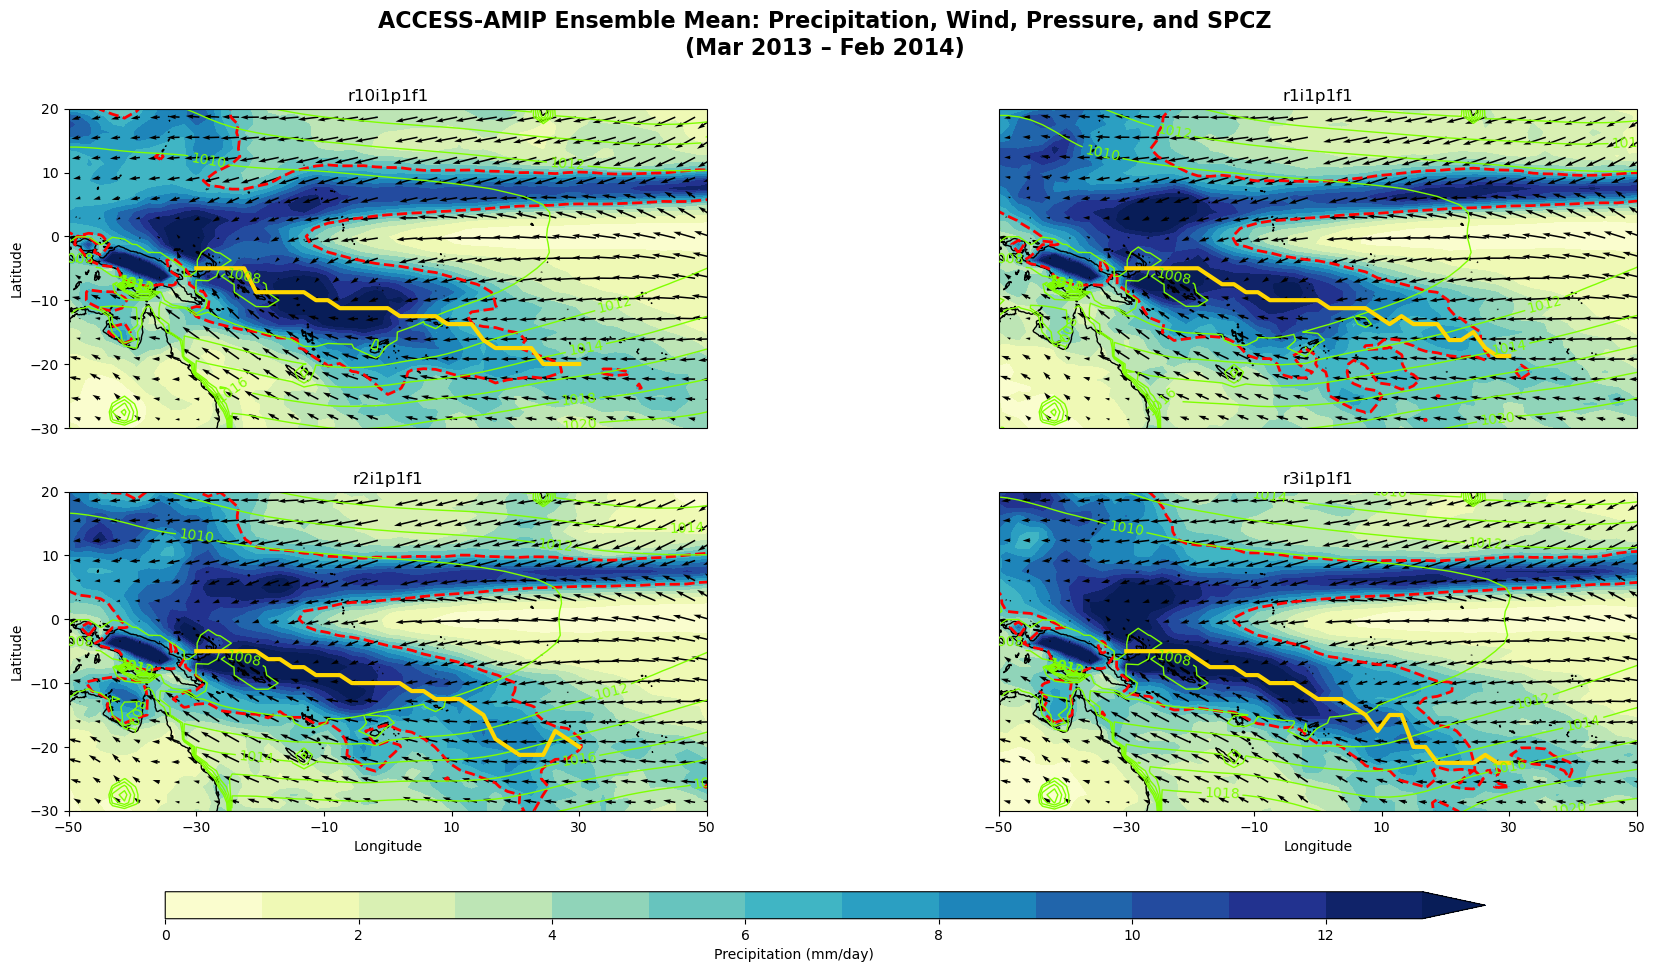

In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# File path
amip_path = '/scratch/nf33/hk25-ConvZones'
amip_file = 'access_amip_ensemble_tot_avg_201303_201402.nc'
ds = xr.open_dataset(f"{amip_path}/{amip_file}")

# Region selection: 30°S to 20°N and 130°E to 230°E
ds_sel = ds.sel(lat=slice(-35, 25), lon=slice(125, 235))

# Convert variables
pr_mm_day = ds_sel['pr'] * 86400  # mm/day
uas = ds_sel['uas']
vas = ds_sel['vas']
ps = ds_sel['ps'] / 100  # hPa
vec_step = 1

# Runs
runs = ds_sel['run'].values[:4]  # Limit to first 4 runs
n_runs = len(runs)

# Longitude and latitude
lons = ds_sel['lon']
lats = ds_sel['lat']

# Set up figure
nrows = 2
ncols = int(np.ceil(n_runs / nrows))
fig, axs = plt.subplots(nrows, ncols, figsize=(22, 9),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
axs = axs.flatten()

for i, run_name in enumerate(runs):
    ax = axs[i]

    # Select data for run
    pr = pr_mm_day.sel(run=run_name)
    u = uas.sel(run=run_name)
    v = vas.sel(run=run_name)
    pressure = ps.sel(run=run_name)

    # Precipitation: filled contour
    cf = ax.contourf(lons, lats, pr, levels=range(0, 14), cmap='YlGnBu', extend='max',
                     transform=ccrs.PlateCarree())

    # Add red contour line for 6 mm/day precipitation
    ax.contour(lons, lats, pr, levels=[6], colors='red', linewidths=2, linestyles='--',
           transform=ccrs.PlateCarree())

    # Wind: quiver (subsampled)
    ax.quiver(lons[::vec_step], lats[::vec_step], u[::vec_step, ::vec_step], v[::vec_step, ::vec_step], scale=200, regrid_shape=20,
              transform=ccrs.PlateCarree())

    # Pressure: contour + labels
    cs = ax.contour(lons, lats, pressure, levels=range(1008, 1022, 2), colors='chartreuse', linewidths=1,
                    transform=ccrs.PlateCarree())
    ax.clabel(cs, inline=1, fontsize=10, fmt='%d')

    # SPCZ line (gold): smoothed max precipitation latitude per longitude
    spcz_lon_range = lons.sel(lon=slice(150, 210)).values
    spcz_lat = []

    for lon in spcz_lon_range:
        pr_lon = pr.sel(lon=lon, method='nearest')
        pr_sub = pr_lon.sel(lat=slice(-30, 0))
        pr_smooth = pr_sub.rolling(lat=9, center=True).mean()
        lat_max = pr_smooth.lat[pr_smooth.argmax(dim='lat')].values
        spcz_lat.append(lat_max)

    ax.plot(spcz_lon_range, spcz_lat, color='gold', linewidth=3,
            transform=ccrs.PlateCarree(), label='SPCZ')

    # Map styling
    ax.coastlines()
    ax.set_title(str(run_name))

    # Add ticks for easier reading
    if i % ncols == 0:  # Left column
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.arange(-30, 25, 10), crs=ccrs.PlateCarree())
        ax.tick_params(labelleft=True)
    else:
        ax.tick_params(labelleft=False)

    if i >= ncols * (nrows - 1):  # Bottom row
        ax.set_xlabel('Longitude')
        ax.set_xticks(np.arange(130, 231, 20), crs=ccrs.PlateCarree())
        ax.tick_params(labelbottom=True)
    else:
        ax.tick_params(labelbottom=False)

    ax.set_extent([130, 230, -30, 20], crs=ccrs.PlateCarree())

# Shared colorbar
fig.subplots_adjust(bottom=0.1)  # Leave space below plots
cbar_ax = fig.add_axes([0.2, -0.02, 0.6, 0.03])  # [left, bottom, width, height]
fig.colorbar(cf, cax=cbar_ax, orientation='horizontal', label='Precipitation (mm/day)')

# Suptitle
fig.suptitle("ACCESS-AMIP Ensemble Mean: Precipitation, Wind, Pressure, and SPCZ\n(Mar 2013 – Feb 2014)",
             fontsize=16, fontweight='bold', y=0.99)

plt.show()


In [8]:
print(180 in lons.values)
print(lons.sel(lon=180, method='nearest').values)


True
180.0


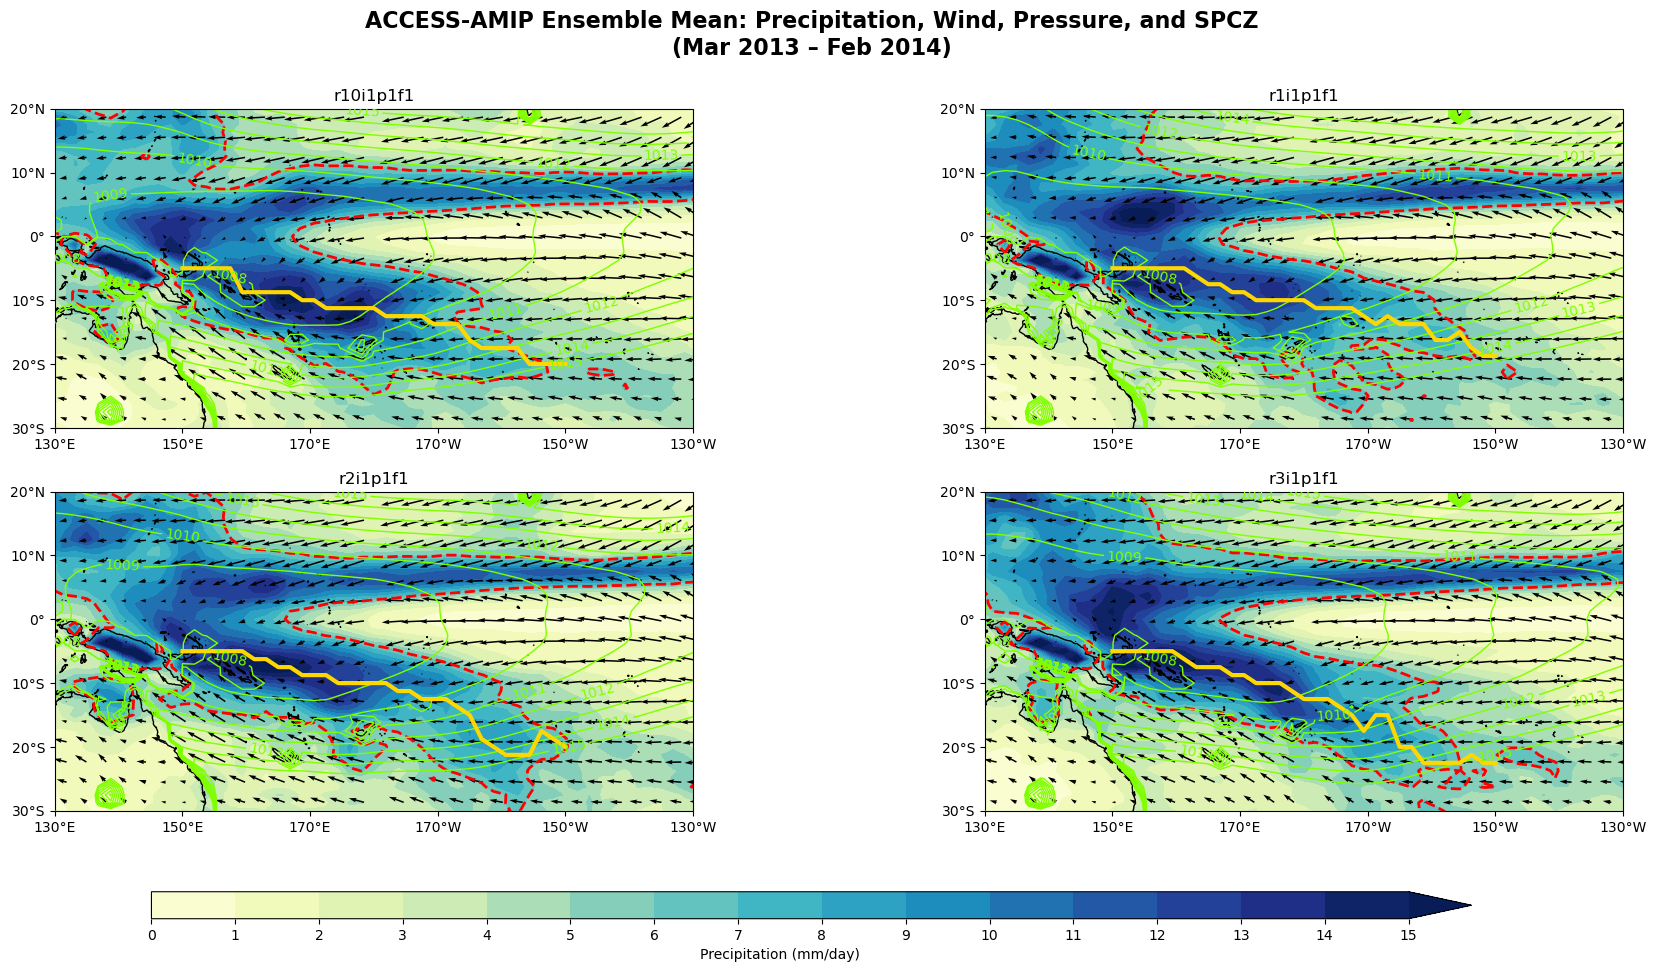

In [23]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# File path
amip_path = '/scratch/nf33/hk25-ConvZones'
amip_file = 'access_amip_ensemble_tot_avg_201303_201402.nc'
ds = xr.open_dataset(f"{amip_path}/{amip_file}")

# Region selection: 30°S to 20°N and 130°E to 230°E
ds_sel = ds.sel(lat=slice(-35, 25), lon=slice(125, 235))

# Convert variables
pr_mm_day = ds_sel['pr'] * 86400  # mm/day
uas = ds_sel['uas']
vas = ds_sel['vas']
ps = ds_sel['ps'] / 100  # hPa
vec_step = 1

# Runs
runs = ds_sel['run'].values[:4]  # Limit to first 4 runs
n_runs = len(runs)

# Longitude and latitude
lons = ds_sel['lon']
lats = ds_sel['lat']

# Define Precipitation levels
levels = np.arange(0, 16, 1)

# Set up figure
nrows = 2
ncols = int(np.ceil(n_runs / nrows))
fig, axs = plt.subplots(nrows, ncols, figsize=(22, 9),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
axs = axs.flatten()

for i, run_name in enumerate(runs):
    ax = axs[i]

    # Select data for run
    pr = pr_mm_day.sel(run=run_name)
    u = uas.sel(run=run_name)
    v = vas.sel(run=run_name)
    pressure = ps.sel(run=run_name)

    # Precipitation: filled contour
    cf = ax.contourf(lons, lats, pr, levels=levels, cmap='YlGnBu', extend='max',
                     transform=ccrs.PlateCarree())

    # Add red contour line for 6 mm/day precipitation
    ax.contour(lons, lats, pr, levels=[6], colors='red', linewidths=2, linestyles='--',
           transform=ccrs.PlateCarree())

    # Wind: quiver (subsampled)
    ax.quiver(lons[::vec_step], lats[::vec_step], u[::vec_step, ::vec_step], v[::vec_step, ::vec_step], scale=200, regrid_shape=20,
              transform=ccrs.PlateCarree())

    # Pressure: contour + labels
    cs = ax.contour(lons, lats, pressure, levels=range(1008, 1016, 1), colors='chartreuse', linewidths=1,
                    transform=ccrs.PlateCarree())
    ax.clabel(cs, inline=1, fontsize=10, fmt='%d')

    # SPCZ line (gold): smoothed max precipitation latitude per longitude
    spcz_lon_range = lons.sel(lon=slice(150, 210)).values
    spcz_lat = []

    for lon in spcz_lon_range:
        pr_lon = pr.sel(lon=lon, method='nearest')
        pr_sub = pr_lon.sel(lat=slice(-30, 0))
        pr_smooth = pr_sub.rolling(lat=9, center=True).mean()
        lat_max = pr_smooth.lat[pr_smooth.argmax(dim='lat')].values
        spcz_lat.append(lat_max)

    ax.plot(spcz_lon_range, spcz_lat, color='gold', linewidth=3,
            transform=ccrs.PlateCarree(), label='SPCZ')

    # Map styling
    ax.coastlines()
    ax.set_title(str(run_name))

    # Set custom ticks
    xticks = np.arange(130, 231, 20)  # still in 0–360 format
    yticks = np.arange(-30, 25, 10)
    
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    
    # Format as °E / °W and °N / °S
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol='°', number_format='.0f'))
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol='°', number_format='.0f'))

    ax.set_extent([130, 230, -30, 20], crs=ccrs.PlateCarree())

# Shared colorbar
fig.subplots_adjust(bottom=0.1)  # Leave space below plots
cbar_ax = fig.add_axes([0.2, -0.02, 0.6, 0.03])  # [left, bottom, width, height]
fig.colorbar(cf, cax=cbar_ax, ticks=levels, orientation='horizontal', label='Precipitation (mm/day)')

# Suptitle
fig.suptitle("ACCESS-AMIP Ensemble Mean: Precipitation, Wind, Pressure, and SPCZ\n(Mar 2013 – Feb 2014)",
             fontsize=16, fontweight='bold', y=0.99)

plt.show()


In [24]:
np.any(np.isnan(uas.sel(run=runs[0])))


<xarray.DataArray 'uas' ()> Size: 1B
array(False)
Coordinates:
    run      <U9 36B 'r10i1p1f1'

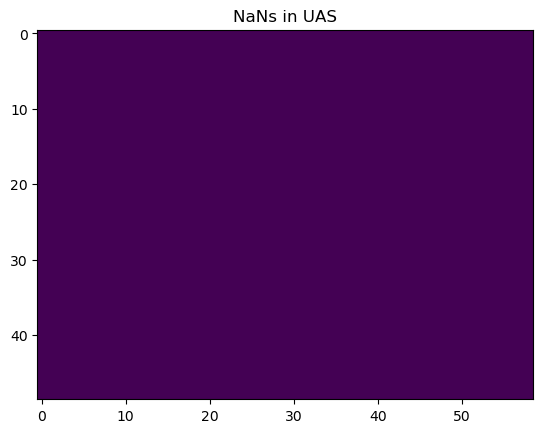

In [25]:
plt.imshow(np.isnan(uas.sel(run=runs[0])), aspect='auto')
plt.title('NaNs in UAS')
plt.show()


In [26]:
u = u.where(~np.isnan(u) & ~np.isnan(v))
v = v.where(~np.isnan(v) & ~np.isnan(u))


In [28]:
lons[::vec_step]

<xarray.DataArray 'lon' (lon: 59)> Size: 472B
array([125.625, 127.5  , 129.375, 131.25 , 133.125, 135.   , 136.875, 138.75 ,
       140.625, 142.5  , 144.375, 146.25 , 148.125, 150.   , 151.875, 153.75 ,
       155.625, 157.5  , 159.375, 161.25 , 163.125, 165.   , 166.875, 168.75 ,
       170.625, 172.5  , 174.375, 176.25 , 178.125, 180.   , 181.875, 183.75 ,
       185.625, 187.5  , 189.375, 191.25 , 193.125, 195.   , 196.875, 198.75 ,
       200.625, 202.5  , 204.375, 206.25 , 208.125, 210.   , 211.875, 213.75 ,
       215.625, 217.5  , 219.375, 221.25 , 223.125, 225.   , 226.875, 228.75 ,
       230.625, 232.5  , 234.375])
Coordinates:
  * lon      (lon) float64 472B 125.6 127.5 129.4 131.2 ... 230.6 232.5 234.4
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      Longitude
    standard_name:  longitude